In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pickle

In [2]:
df=pd.read_csv('hr_dataset.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.shape

(1470, 35)

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
df.loc[0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

In [7]:
# Select only object-type columns
object_cols = df.select_dtypes(include='object')

# Loop through each object column and print unique and nunique
for col in object_cols.columns:
    print(f"\nColumn: {col}")
    print(f"Number of unique values: {object_cols[col].nunique()}")
    print(f"Unique values:\n{object_cols[col].unique()}")


Column: Attrition
Number of unique values: 2
Unique values:
['Yes' 'No']

Column: BusinessTravel
Number of unique values: 3
Unique values:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Column: Department
Number of unique values: 3
Unique values:
['Sales' 'Research & Development' 'Human Resources']

Column: EducationField
Number of unique values: 6
Unique values:
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Column: Gender
Number of unique values: 2
Unique values:
['Female' 'Male']

Column: JobRole
Number of unique values: 9
Unique values:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Column: MaritalStatus
Number of unique values: 3
Unique values:
['Single' 'Married' 'Divorced']

Column: Over18
Number of unique values: 1
Unique values:
['Y']

Column: OverTime
Number of unique values: 2
Unique val

In [9]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

## EDA

In [8]:
sns.set(style="whitegrid")
plt.style.use('fivethirtyeight')

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_22644\306714251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


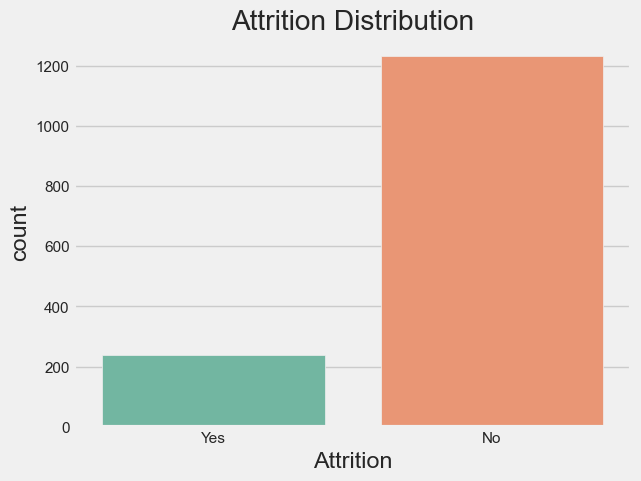

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [10]:
# Countplot for target variable
sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()

# Percentage
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(attrition_rate)

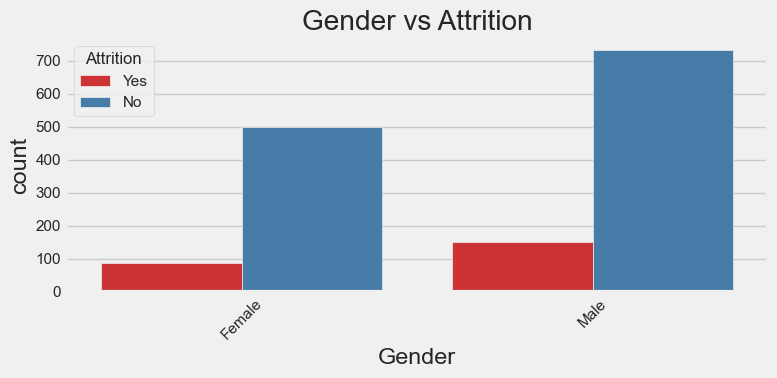

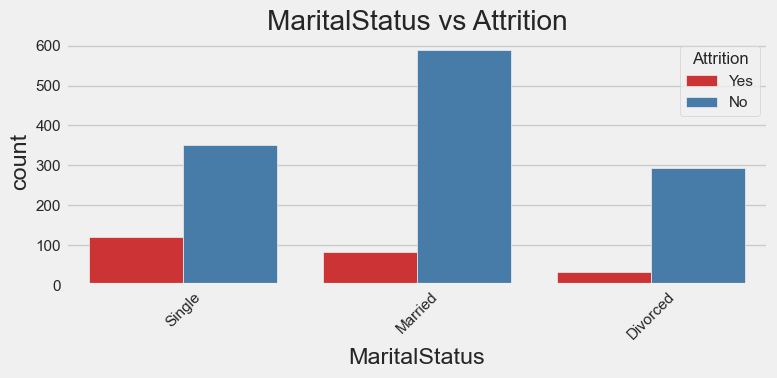

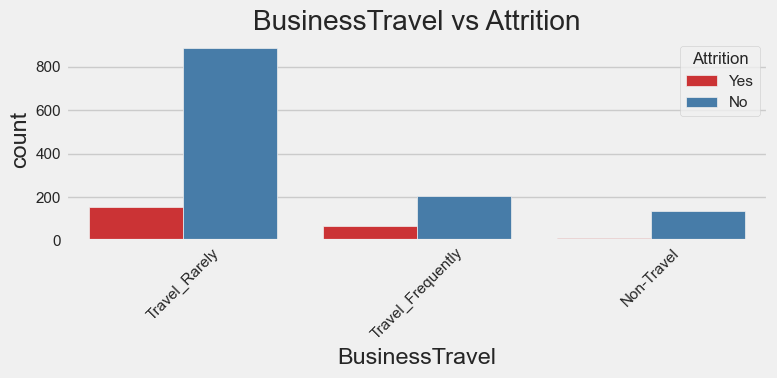

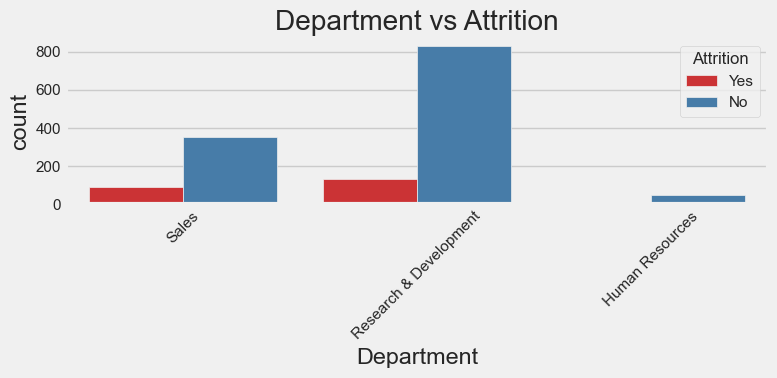

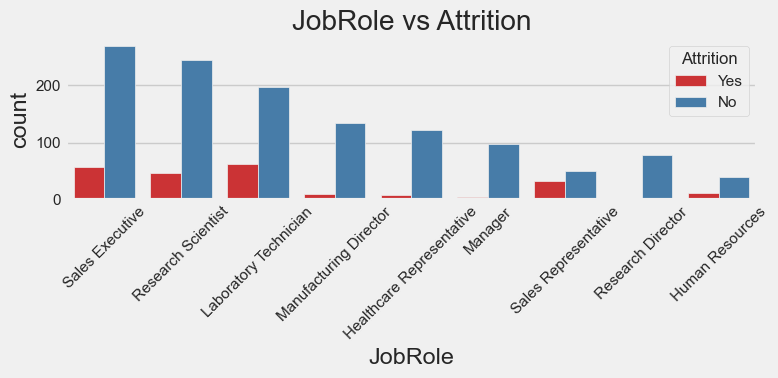

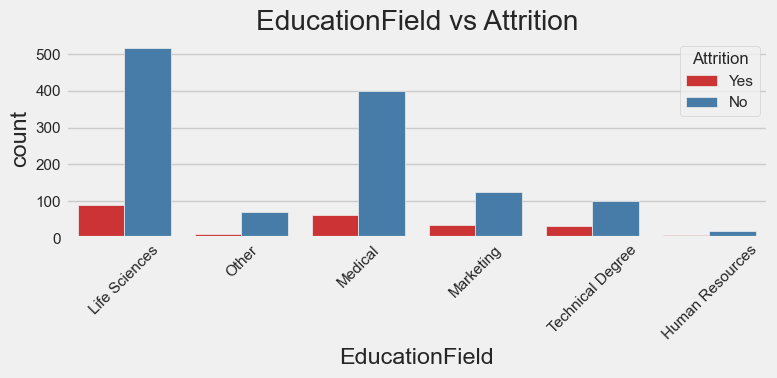

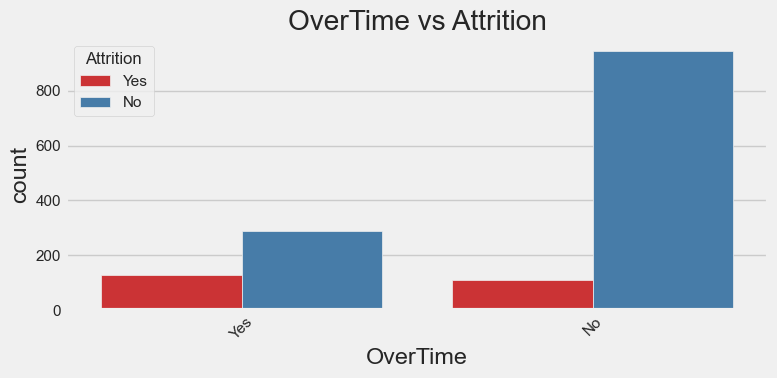

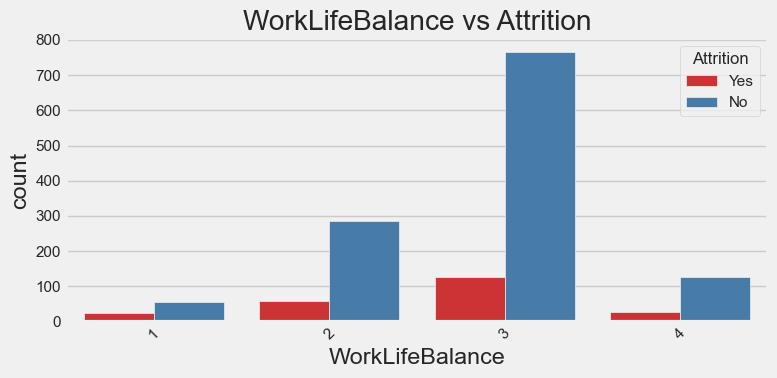

In [11]:
categorical_features = ['Gender', 'MaritalStatus', 'BusinessTravel', 'Department',
                        'JobRole', 'EducationField', 'OverTime', 'WorkLifeBalance']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set1')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

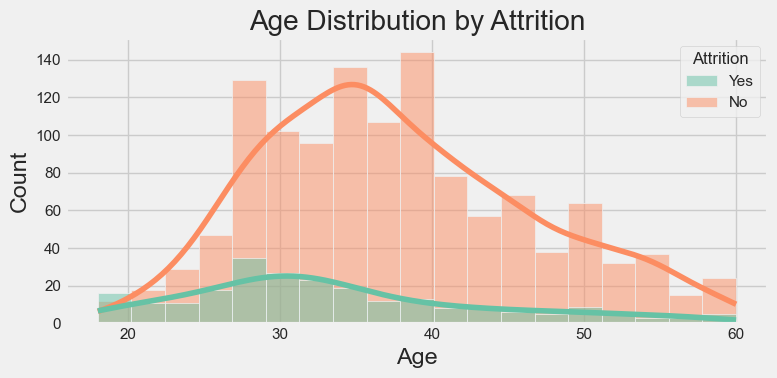

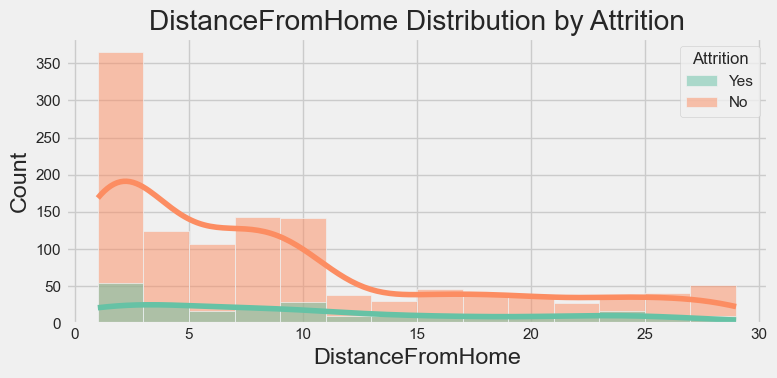

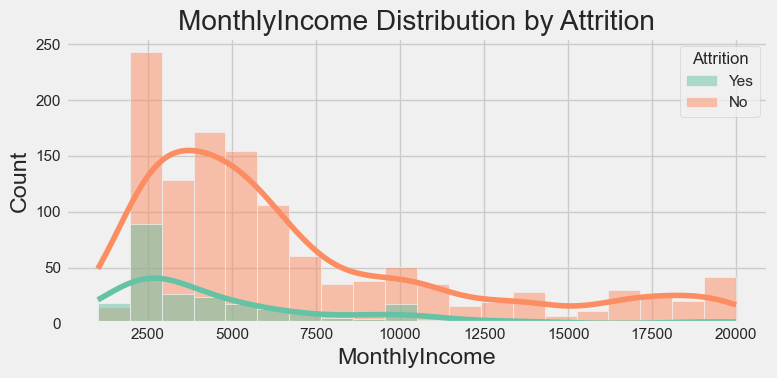

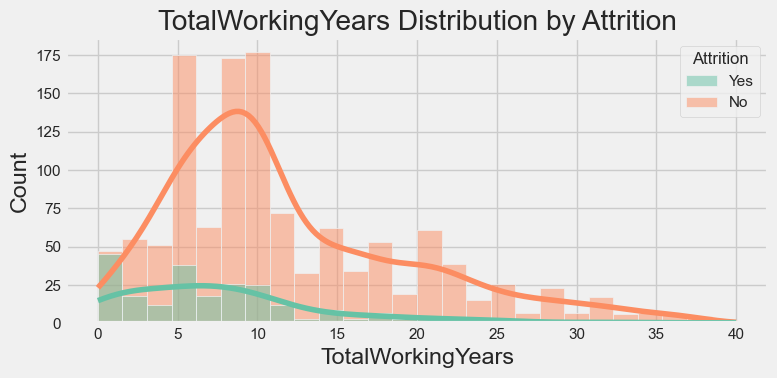

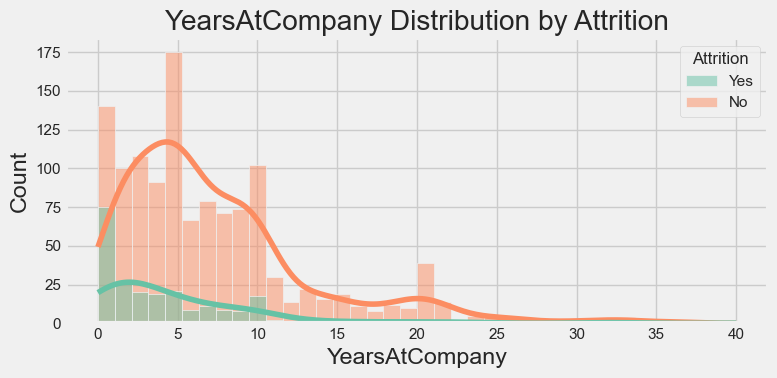

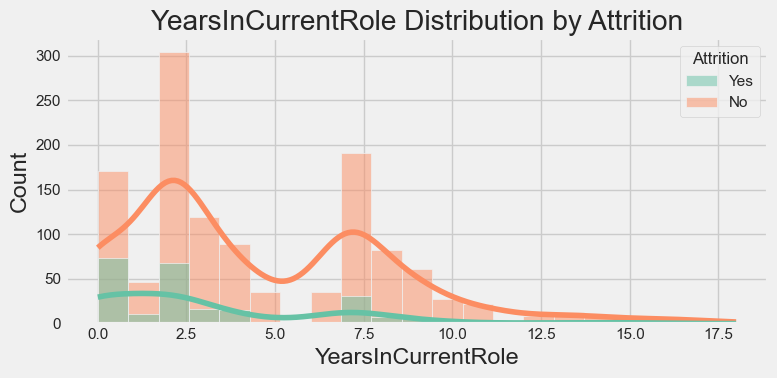

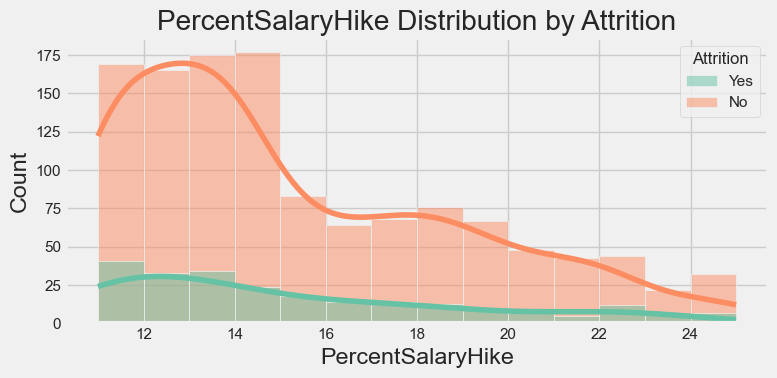

In [12]:
numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'TotalWorkingYears',
                      'YearsAtCompany', 'YearsInCurrentRole', 'PercentSalaryHike']

for col in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='Attrition', kde=True, palette='Set2')
    plt.title(f'{col} Distribution by Attrition')
    plt.tight_layout()
    plt.show()

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_22644\473525989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


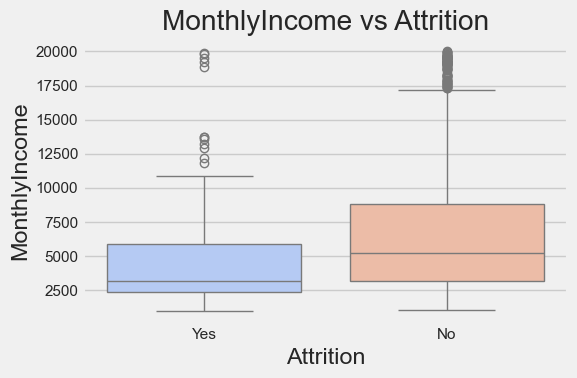

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_22644\473525989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


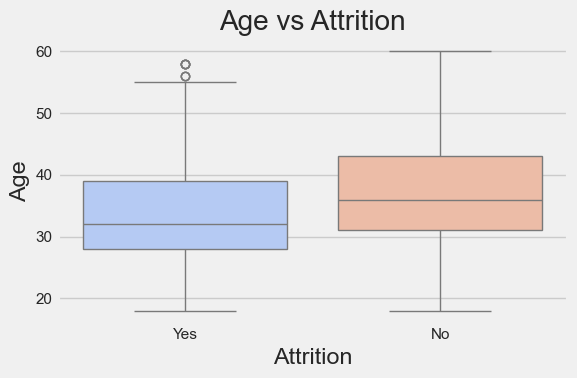

C:\Users\Hardik Singh\AppData\Local\Temp\ipykernel_22644\473525989.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')


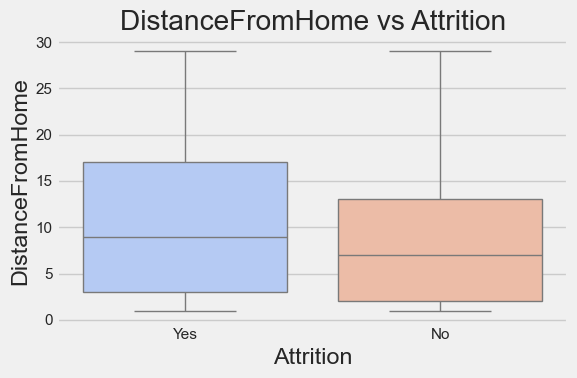

In [13]:
boxplot_features = ['MonthlyIncome', 'Age', 'DistanceFromHome']

for col in boxplot_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='Attrition', y=col, palette='coolwarm')
    plt.title(f'{col} vs Attrition')
    plt.tight_layout()
    plt.show()

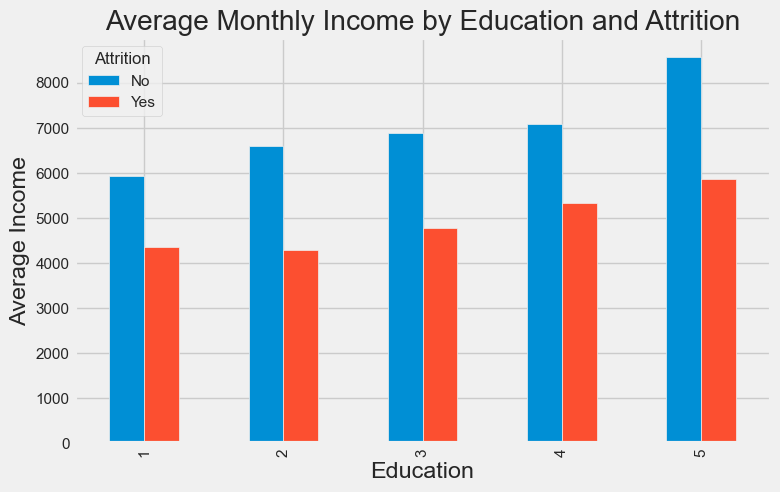

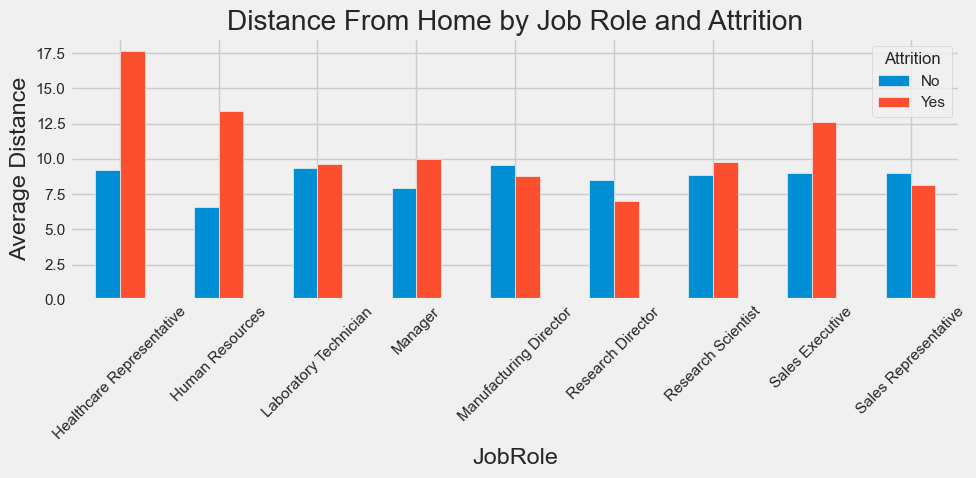

In [15]:
# Average Monthly Income by Education and Attrition
edu_income = df.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().unstack()
edu_income.plot(kind='bar', figsize=(8, 5))
plt.title('Average Monthly Income by Education and Attrition')
plt.ylabel('Average Income')
plt.show()

# Distance from Home by Job Role and Attrition
dist_home = df.groupby(['JobRole', 'Attrition'])['DistanceFromHome'].mean().unstack()
dist_home.plot(kind='bar', figsize=(10, 5))
plt.title('Distance From Home by Job Role and Attrition')
plt.ylabel('Average Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Processing and Selection

In [16]:
df.loc[6]

Age                                             59
Attrition                                       No
BusinessTravel                       Travel_Rarely
DailyRate                                     1324
Department                  Research & Development
DistanceFromHome                                 3
Education                                        3
EducationField                             Medical
EmployeeCount                                    1
EmployeeNumber                                  10
EnvironmentSatisfaction                          3
Gender                                      Female
HourlyRate                                      81
JobInvolvement                                   4
JobLevel                                         1
JobRole                      Laboratory Technician
JobSatisfaction                                  1
MaritalStatus                              Married
MonthlyIncome                                 2670
MonthlyRate                    

In [19]:
# Drop unimportant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [22]:
df['Attrition']=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['OverTime']=df['OverTime'].apply(lambda x: 1 if x=='Yes' else 0)

In [23]:
df.loc[0]

Age                                      41
Attrition                                 1
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
OverTime                                  1
PercentSalaryHike                        11
PerformanceRating                         3
RelationshipSatisfaction        

## Splitting the Data

In [25]:
X=df.drop(columns=['Attrition'])
y=df['Attrition']

In [26]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [27]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [50]:
# Using Random Forest Classifier
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[1,3,6,8,12,14,])
],remainder='passthrough')

step2 = RandomForestClassifier(n_estimators=100,random_state=42,max_samples=0.5,max_features=0.75,max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.8367346938775511


In [52]:
pickle.dump(df,open('./models/df.pkl','wb'))
pickle.dump(pipe,open('./models/pipe.pkl','wb'))

In [53]:
X.loc[0]

Age                                      41
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
OverTime                                  1
PercentSalaryHike                        11
PerformanceRating                         3
RelationshipSatisfaction                  1
StockOptionLevel                